In [ ]:
import sys
!pip install pyspellchecker

     |████████████████████████████████| 2.5MB 8.1MB/s 


In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.3)


In [ ]:
import pandas as pd
import seaborn as sns
import re
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import string
import nltk
nltk.download('vader_lexicon')
import warnings 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##Reading the CSV files

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/train_E6oV3lV.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/test_tweets_anuFYb8.csv')
df_sample = pd.read_csv('https://raw.githubusercontent.com/ErnestSackey/Twitter-Sentiment/main/sample_submission_gfvA5FD.csv') 

In [ ]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
df_train.tweet.unique()

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       '  to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher',
       'listening to sad songs on a monday morning otw to work is sad  ',
       'thank you @user for you follow  '], dtype=object)

In [ ]:
df_train.tweet.nunique() #Checking the number of unique tweets

29530

In [ ]:
df_train['tweet'].dtype #Checking the data type which shows it's object

dtype('O')

In [ ]:
df_train.isna().sum() #Checking if there are empty values in the train data

id       0
label    0
tweet    0
dtype: int64

In [ ]:
df_test.isna().sum() #Checking if there are empty values in the test data

id       0
tweet    0
dtype: int64

In [ ]:
#Why is the nunique is not the same as the count if there are no duplicates.
dupli = df_train.duplicated()
print(dupli.any())

False


In [ ]:
df_test.describe()

,id
count,17197.000000
mean,40561.000000
std,4964.490625
min,31963.000000
25%,36262.000000
50%,40561.000000
75%,44860.000000
max,49159.000000


##Data Cleaning

In [ ]:
#Concatinating the train and test data so both can be cleanse together: A new column (Dateset) created to indicate where each row belongs
df_train['Dataset'] = 'train'
df_test['Dataset'] = 'test'
df_full = pd.concat([df_train, df_test])
df_full.head()

,id,label,tweet,Dataset
0,1,0.0,@user when a father is dysfunctional and is s...,train
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train
2,3,0.0,bihday your majesty,train
3,4,0.0,#model i love u take with u all the time in ...,train
4,5,0.0,factsguide: society now #motivation,train


In [ ]:
len(df_full)

49159

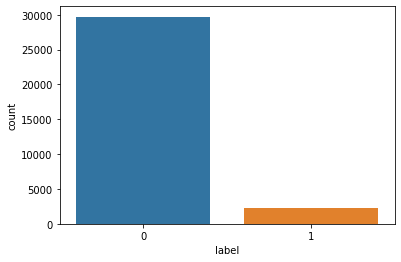

In [ ]:
sns.countplot(x='label',data=df_train)

##Cleaning the Regular Expression

In [ ]:
import string
import re #'re' stand for regular expression (patterns in text)
punc = string.punctuation.replace('#', '').replace('@', '').replace('\'', '')
punc = re.escape(punc)
punc
#This didn't work as planned

'\\!\\"\\$\\%\\&\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\[\\\\\\]\\^_\\`\\{\\|\\}\\~'

## Removing Twitter Handles (@user) and Hashtag tags

In [ ]:
df_full['clean'] = df_full['tweet'].str.replace('\@user', '')
df_full['clean'] = df_full['clean'].str.replace('#', '')

## Removing Punctuations, Numbers, and Special Characters

In [ ]:
df_full['clean'] = df_full['clean'].str.replace("[^a-zA-Z#]", " ") 

## Removing Short Words

In [ ]:
df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 

## Tokenization

In [ ]:
tokenized_tweet = df_full['clean'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, lyft, credit, cause, they, offer, whe...
2                              [bihday, your, majesty]
3                      [model, love, take, with, time]
4                    [factsguide, society, motivation]
Name: clean, dtype: object

In [ ]:
#df_full['clean'] = df_full['tweet'].str.replace(f'[{punc}]', '') #cleaning punctuations
#df_full['clean'] = df_full['clean'].str.replace('\#', '') #cleaning the # key
#df_full['clean'] = df_full['clean'].str.lower() #changing everything to a lower case

In [ ]:
df_full.head(15)

,id,label,tweet,Dataset,clean
0,1,0.0,@user when a father is dysfunctional and is s...,train,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,thanks lyft credit cause they offer wheelchair...
2,3,0.0,bihday your majesty,train,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,train,model love take with time
4,5,0.0,factsguide: society now #motivation,train,factsguide society motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,train,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,train,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,train,next school year year exams think about that s...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,train,love land allin cavs champions cleveland cleve...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,train,welcome here


In [ ]:
#splitting every word in the tweets to form a single list
words = df_full['clean'].str.split()
words = [word for sublist in words for word in sublist]

In [ ]:
len(words)

368337

In [ ]:
#Counting the words to get a hint on the frequency of word
from collections import Counter
word_counts = Counter(words)
word_counts.most_common(20)

[('love', 4273),
 ('this', 4140),
 ('with', 3881),
 ('that', 3194),
 ('your', 2651),
 ('happy', 2651),
 ('have', 2487),
 ('just', 2105),
 ('will', 1953),
 ('when', 1911),
 ('what', 1847),
 ('life', 1775),
 ('time', 1771),
 ('like', 1700),
 ('today', 1685),
 ('from', 1650),
 ('thankful', 1436),
 ('positive', 1427),
 ('people', 1362),
 ('bihday', 1344)]

In [ ]:
c_words = pd.DataFrame(word_counts.most_common(20))
c_words.columns = ['Common_words','count']
c_words

,Common_words,count
0,love,4273
1,this,4140
2,with,3881
3,that,3194
4,your,2651
5,happy,2651
6,have,2487
7,just,2105
8,will,1953
9,when,1911


In [ ]:
fig = px.bar(c_words, x="count", y="Common_words", title='Common Words in clean tweet', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
#Using the Natural Language Toolkit (stopwords) to help filter some needless words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
words_stop = stopwords.words('english') + ['can\'t', 'u']
#Since stopwords may not capture all the words in our tweets, we can find words in the tweet that aren't in the stopwaord folder to add to to the stopwords.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Creating a column which contains the filtered tweets of the words that are needless
df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([word for word in x.split() if not word in words_stop]))
df_full.head(15)

,id,label,tweet,Dataset,clean
0,1,0.0,@user when a father is dysfunctional and is s...,train,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,thanks lyft credit cause offer wheelchair vans...
2,3,0.0,bihday your majesty,train,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,train,model love take time
4,5,0.0,factsguide: society now #motivation,train,factsguide society motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,train,huge fare talking leave chaos disputes allshow...
6,7,0.0,@user camping tomorrow @user @user @user @use...,train,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,train,next school year year exams think school exams...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,train,love land allin cavs champions cleveland cleve...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,train,welcome


In [ ]:
fig = px.treemap(c_words, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

## Most common words Sentiments Wise

In [ ]:
pos_sent = df_train[df_train['label']==0]
neg_sent = df_train[df_train['label']==1]

In [ ]:
neg_sent

,id,label,tweet,Dataset
13,14,1,@user #cnn calls #michigan middle school 'buil...,train
14,15,1,no comment! in #australia #opkillingbay #se...,train
17,18,1,retweet if you agree!,train
23,24,1,@user @user lumpy says i am a . prove it lumpy.,train
34,35,1,it's unbelievable that in the 21st century we'...,train
...,...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...,train
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...,train
31947,31948,1,@user @user you don't have the balls to hashta...,train
31948,31949,1,"makes you ask yourself, who am i? then am i a...",train


In [ ]:
common_positive = pd.DataFrame(word_counts.most_common(20))
common_positive.columns = ['Common_words','count']
common_positive.head(20)

,Common_words,count
0,love,4273
1,this,4140
2,with,3881
3,that,3194
4,your,2651
5,happy,2651
6,have,2487
7,just,2105
8,will,1953
9,when,1911


In [ ]:
#Checking how the PorterStemmer works (Some words will mean the same even after). 
#from nltk.stem import PorterStemmer
#ps = PorterStemmer()
#s = 'consult consultant consulting consultants consultantative'
#[ps.stem(w) for w in s.split()]

In [ ]:
#df_full['clean'] = df_full['clean'].apply(lambda x: ' '.join([ps.stem(w) for w in x.split()]))
#df_full.head()
#the library (ps.stem) is not effectice since it is changing some of the letter from y to i. See the row 12, 23, and 24

In [ ]:
#Splitting the wrods in the clean column again to enable counting
words = df_full['clean'].str.split() 
words = [word for sublist in words for word in sublist]

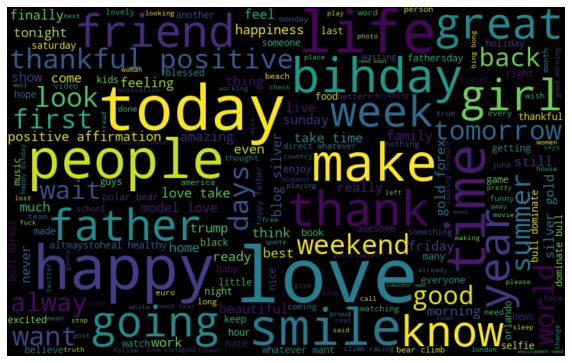

In [ ]:
all_words = ' '.join([text for text in df_full['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

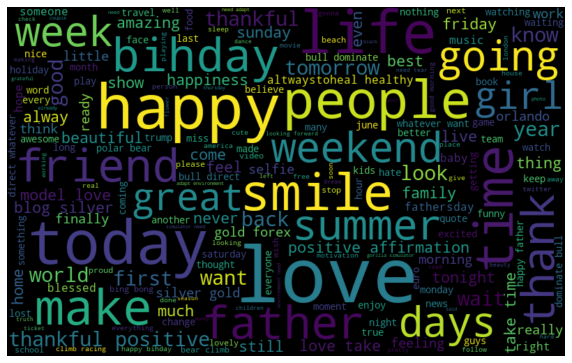

In [ ]:
normal_words =' '.join([text for text in df_full['clean'][df_full['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

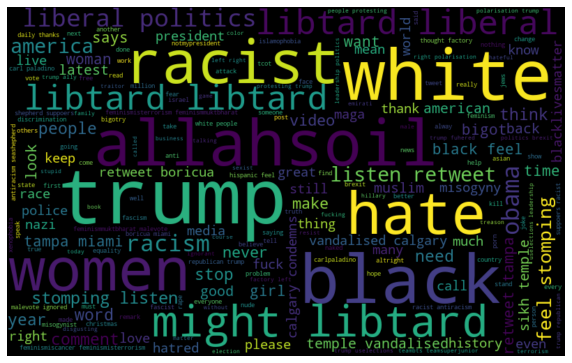

In [ ]:
negative_words = ' '.join([text for text in df_full['clean'][df_full['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [ ]:
df_full['scores'] = df_full['clean'].apply(lambda x: vader.polarity_scores(x))
df_full.head(20)

#The score indicates neg for negative, neu for neutral, pos for positive, and finally the compound.
#the first row(id = 1) shows the tweet is 71.7% negative
#the compound value is basically the normal of the 3 values negative, positive and neutral

,id,label,tweet,Dataset,clean,scores
0,1,0.0,@user when a father is dysfunctional and is s...,train,father dysfunctional selfish drags kids dysfun...,"{'neg': 0.717, 'neu': 0.283, 'pos': 0.0, 'comp..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,train,thanks lyft credit cause offer wheelchair vans...,"{'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compou..."
2,3,0.0,bihday your majesty,train,bihday majesty,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,4,0.0,#model i love u take with u all the time in ...,train,model love take time,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp..."
4,5,0.0,factsguide: society now #motivation,train,factsguide society motivation,"{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp..."
5,6,0.0,[2/2] huge fan fare and big talking before the...,train,huge fare talking leave chaos disputes allshow...,"{'neg': 0.569, 'neu': 0.244, 'pos': 0.187, 'co..."
6,7,0.0,@user camping tomorrow @user @user @user @use...,train,camping tomorrow danny,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,8,0.0,the next school year is the year for exams.ð...,train,next school year year exams think school exams...,"{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'comp..."
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,train,love land allin cavs champions cleveland cleve...,"{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'comp..."
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,train,welcome,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_full['clean'])

In [ ]:
tfidf

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 156442 stored elements in Compressed Sparse Row format>